<a href="https://colab.research.google.com/github/AdoniaSequeira/Neural_Networks_Project/blob/main/Neural_Network_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#Performing Text Analysis on the data to know more about the data

In [69]:
df = pd.read_csv('/content/combined_data.csv', encoding='latin1')
print(df)

       label                                               text
0          1  ounce feather bowl hummingbird opec moment ala...
1          1  wulvob get your medircations online qnb ikud v...
2          0   computer connection from cnn com wednesday es...
3          1  university degree obtain a prosperous future m...
4          0  thanks for all your answers guys i know i shou...
...      ...                                                ...
83443      0  hi given a date how do i get the last date of ...
83444      1  now you can order software on cd or download i...
83445      1  dear valued member canadianpharmacy provides a...
83446      0  subscribe change profile contact us long term ...
83447      1  get the most out of life ! viagra has helped m...

[83448 rows x 2 columns]


In [70]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [71]:
df.columns

Index(['label', 'text'], dtype='object')

In [72]:
df.describe()

,label
count,83448.000000
mean,0.526196
std,0.499316
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [73]:
df.isnull().sum()

,0
label,0
text,0


In [74]:
df['label'].value_counts()

,count
label,
1,43910
0,39538


In [75]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [76]:
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '<URL>', x))

In [77]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [78]:
df['text'] = df['text'].apply(lambda x: x.lower())

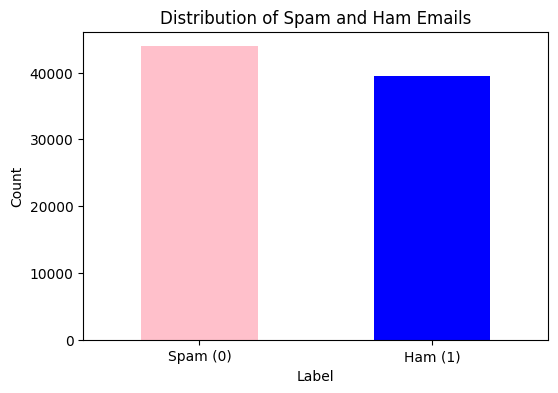

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['pink', 'blue'])
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Spam (0)', 'Ham (1)'], rotation=0)
plt.show()

In [80]:
class_distribution = df['label'].value_counts()
print(class_distribution)

label
1    43910
0    39538
Name: count, dtype: int64


In [81]:
spam_count = class_distribution[0]
ham_count = class_distribution[1]
imbalance_ratio = spam_count / ham_count
print(f"Imbalance Ratio (Spam/Ham): {imbalance_ratio:.2f}")

Imbalance Ratio (Spam/Ham): 0.90


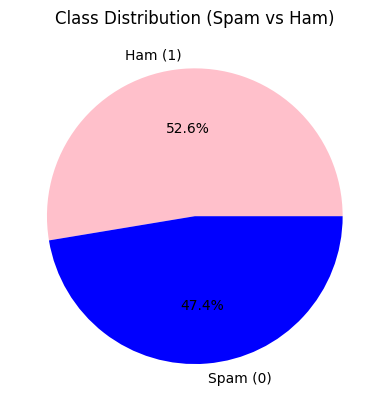

In [82]:
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='pie', labels=['Ham (1)', 'Spam (0)'], autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Class Distribution (Spam vs Ham)')
plt.ylabel('')
plt.show()